## Hurdat2, Get Started!
In the following example we will walk through how we can leverage the `clouddrift` library to plot storm trajectories for the 2022 hurricane season.

Let's proceed with loading in the dataset and selecting the subset of data we want to plot.

In [13]:
import  numpy as np

import clouddrift as cd
year = 2022
ds = cd.datasets.hurdat2(basin="atlantic")
ds = cd.ragged.subset(
    ds,
    {"time": (np.datetime64(f"{year}-01-01"), np.datetime64(f"{year}-12-31"))},
    row_dim_name="traj",
)

Now let's unpack the ragged array for the longituide and latitude observations for the storm trajectories. The unpack function will return the array segmented using the rowsize of each trajectory resulting in a list of row data variable segments.

Let's now plot the trajectories.

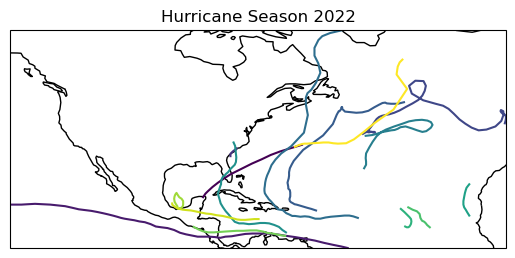

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

cd.plotting.plot_ragged(
    ax,
    ds.lon,
    ds.lat,
    ds.rowsize,
    transform=ccrs.PlateCarree(),
)

ax.set_title(f"Hurricane Season {year}")
ax.coastlines()